In [1]:
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random
import tensorflow as tf

In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory)]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(ord(d))
    return images, labels

ROOT_PATH="/Users/anoushkajain/SignLanguage/Project"
train_data_directory=os.path.join(ROOT_PATH, "train")

images, labels=load_data(train_data_directory)

In [3]:
images_array = np.array(images)
labels_array = np.array(labels)

# Print the number of `images`'s elements
print("Total number of images:",images_array.size)
# Count the number of labels
print("Total No of classes:",len(set(labels_array)))
print("Label Array: ",[chr(X) for X in set(labels)])

Total number of images: 4852
Total No of classes: 24
Label Array:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


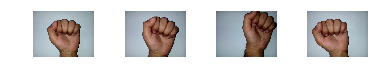

In [4]:
# Determine the (random) indexes of the images that you want to see 
hand_signs = [12,45,65,35]

# Fill out the subplots with the random images that you defined 
for i in range(len(hand_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[hand_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

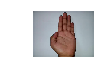

shape: (480, 640, 3), min: 0, max: 228


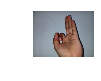

shape: (480, 640, 3), min: 0, max: 255


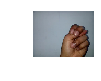

shape: (480, 640, 3), min: 0, max: 255


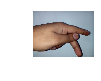

shape: (480, 640, 3), min: 0, max: 225


In [5]:
# Determine the (random) indexes of the images
hand_signs = [300, 1250, 2650, 3000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(hand_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[hand_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[hand_signs[i]].shape, 
                                                  images[hand_signs[i]].min(), 
                                                  images[hand_signs[i]].max()))

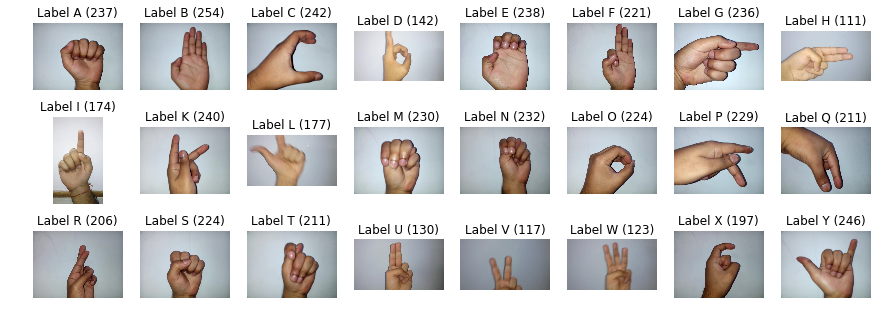

In [6]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(chr(label), labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()


In [7]:
images32 = [transform.resize(image, (28, 28,3)) for image in images]
images32 = np.array(images32)

/Users/anoushkajain/miniconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/anoushkajain/miniconda3/envs/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [8]:
images32 = rgb2gray(np.array(images32))

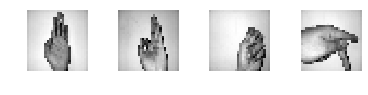

(4852, 28, 28)


In [9]:
for i in range(len(hand_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[hand_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
plt.show()

print(images32.shape)

model

In [11]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense


model = Sequential()
model.add(Flatten())


In [12]:
model.add(Dense(100, activation='relu', input_dim= images32.shape[1]))
model.add(Dense(24, activation='softmax'))
            
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))
model.fit(x_train, y_train, epochs=5, batch_size=32)
model.train_on_batch(x_batch, y_batch)
classes = model.predict(x_test, batch_size=128)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt

